<span style= "font-size:24px;"> **NHL: Birthday and Elite Athletes**

Testing the hypothesis that birthdays make elit athletes in Hockeys

<span style="font-size:20px;"> **Hiding data with API**

*Steps:*
1. Scraping NHL statistics to extract each player's unique endpoint and his birthday
2. Create a data frame
3. Plot the histogram

In [1]:
# Load library
import pandas as pd
import requests #for API
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df3 = pd.DataFrame(columns=['months'])

In [10]:
# Run through team IDs between 1 and 11 
for team_id in range(1,11,1):
    url = 'https://statsapi.web.nhl.com/api/v1/teams/{}/roster'.format(team_id)
    
    # insert value of each iteration of team_id into a roaster endpoint
    r = requests.get(url)
    
    # read each endpoint into df
    roster_data = r.json()
    df = pd.json_normalize(roster_data['roster'])

    # Add birthday data from each new roster page
    for index, row in df.iterrows():
        newrow = row['person.id']
        url = 'https://statsapi.web.nhl.com/api/v1/people/{}'.format(newrow)
        newerdata = requests.get(url)
        player_stats = newerdata.json()
        
        # scrap birthday and birth country field
        birthday = (player_stats['people'][0]['birthDate']) 
        newmonth = int(birthday.split('-')[1])
        country = (player_stats['people'][0]['birthCountry'])

        # only consider Canada for current analysis
        if country == 'CAN':
            new_row = pd.DataFrame({'months': [newmonth]})
            df3 = pd.concat([df3, new_row], ignore_index=True, axis =0)
        else:
            pass  # If you don't want to add a row for non-'CAN' countries



Axes(0.125,0.11;0.775x0.77)


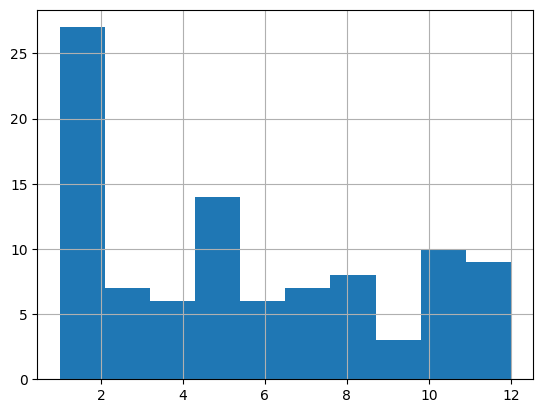

In [11]:
# Plot the histogram
print(df3.months.hist())

 As we can see from the histogram, most of NHL early talent are born in January. However, a histogram may not be a good visualization for the dataset

In [12]:
df3.to_csv('NHL_PlayerData.csv')

In [14]:
df = pd.read_csv('NHL_PlayerData.csv')
print("Month frequency")
print(df['months'].value_counts())

Month frequency
months
5     14
1     14
2     13
10    10
8      8
7      7
3      7
4      6
6      6
11     6
12     3
9      3
Name: count, dtype: int64


It looks like there are nearly double the data in the first 4 months than in the final four. This can make the misconception if we draw the conclusion from the histogram above

<Axes: xlabel='months'>

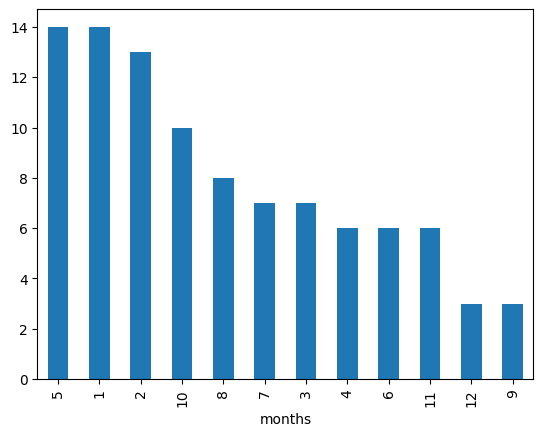

In [15]:
df2 = df['months'].value_counts()
df2.plot(kind ='bar')